In [ ]:
# Importing the Google Drive module from the Colab environment
from google.colab import drive

In [ ]:
# Mounting Google Drive to access files and directories in '/content/drive'
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# File path to the Solar Irradiance processed data stored in Google Drive
file_path = '/content/drive/Shared drives/DATA245_Project/SolarIrradiance_processed.csv'

In [ ]:
# Importing pandas for data manipulation and numpy for numerical operations
import pandas as pd
import numpy as np

In [ ]:
# Reading the Solar Irradiance processed data from the specified file path into a pandas DataFrame
data = pd.read_csv(file_path)

In [ ]:
#shape of the data
data.shape

(1314720, 21)

In [ ]:
#checking data- Top 1 row
data.head(1)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
0,2018,1,1,0,30,10.4,0,0,0,4,...,0,0,0,96.33,165.11,1024,1.7,0.7,95110,late_night_start_of_day


In [ ]:
#checking all the features or columns of the data
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'GHI', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure',
       'Precipitable Water', 'Wind Speed', 'zipcode', 'hour_day_part'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314720 entries, 0 to 1314719
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Year                1314720 non-null  int64  
 1   Month               1314720 non-null  int64  
 2   Day                 1314720 non-null  int64  
 3   Hour                1314720 non-null  int64  
 4   Minute              1314720 non-null  int64  
 5   Temperature         1314720 non-null  float64
 6   Clearsky DHI        1314720 non-null  int64  
 7   Clearsky DNI        1314720 non-null  int64  
 8   Clearsky GHI        1314720 non-null  int64  
 9   Cloud Type          1314720 non-null  int64  
 10  Dew Point           1314720 non-null  float64
 11  DHI                 1314720 non-null  int64  
 12  DNI                 1314720 non-null  int64  
 13  GHI                 1314720 non-null  int64  
 14  Relative Humidity   1314720 non-null  float64
 15  Solar Zenith An

Year: The year of the observation.
Month: The month of the observation.
Day: The day of the observation.
Hour: The hour of the observation.
Minute: The minute of the observation.
Temperature: The temperature measured in Celsius.
Clearsky DHI: Direct Horizontal Irradiance under clear skies.
Clearsky DNI: Direct Normal Irradiance under clear skies.
Clearsky GHI: Global Horizontal Irradiance under clear skies.
Cloud Type: Type of cloud present.
Dew Point: The temperature at which air becomes saturated and dew forms.
DHI: Direct Horizontal Irradiance.
DNI: Direct Normal Irradiance.
GHI: Global Horizontal Irradiance.
Relative Humidity: The amount of moisture in the air relative to the maximum amount of moisture the air can hold at that temperature.
Solar Zenith Angle: The angle between the sun and the zenith.
Pressure: Atmospheric pressure.
Precipitable Water: The depth of liquid water that would result if all the water vapor in the atmosphere above a given location were condensed and deposited on the surface.
Wind Speed: The speed of the wind.
zipcode: The postal code of the location.
hour_day_part: The part of the day (e.g., morning, afternoon, evening).

In [ ]:
# Generating descriptive statistics summarizing the numerical features in the dataset
data.describe()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode
count,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1314720.0,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06
mean,2.020000e+03,6.523549e+00,1.572782e+01,1.150000e+01,30.0,1.569358e+01,4.366212e+01,3.581658e+02,2.483008e+02,1.533958e+00,8.382243e+00,5.261429e+01,2.918992e+02,2.241401e+02,6.802095e+01,8.968456e+01,1.014349e+03,1.553625e+00,1.924700e+00,9.512833e+04
std,1.413827e+00,3.448534e+00,8.799328e+00,6.922189e+00,0.0,6.715500e+00,5.266085e+01,3.912259e+02,3.228307e+02,2.725400e+00,3.899133e+00,7.183775e+01,3.681441e+02,3.088930e+02,2.424006e+01,3.748750e+01,1.045495e+01,6.718073e-01,1.015036e+00,1.508937e+01
min,2.018000e+03,1.000000e+00,1.000000e+00,0.000000e+00,30.0,-2.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.820000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.770000e+00,1.444000e+01,9.590000e+02,2.000000e-01,1.000000e-01,9.511000e+04
25%,2.019000e+03,4.000000e+00,8.000000e+00,5.750000e+00,30.0,1.090000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.916000e+01,6.008000e+01,1.012000e+03,1.100000e+00,1.100000e+00,9.511900e+04
50%,2.020000e+03,7.000000e+00,1.600000e+01,1.150000e+01,30.0,1.440000e+01,1.000000e+01,6.100000e+01,1.100000e+01,0.000000e+00,9.000000e+00,7.000000e+00,0.000000e+00,8.000000e+00,7.340000e+01,8.909000e+01,1.017000e+03,1.400000e+00,1.600000e+00,9.512650e+04
75%,2.021000e+03,1.000000e+01,2.300000e+01,1.725000e+01,30.0,1.930000e+01,8.400000e+01,8.010000e+02,4.960000e+02,3.000000e+00,1.110000e+01,9.100000e+01,6.880000e+02,4.310000e+02,8.885000e+01,1.197800e+02,1.020000e+03,1.900000e+00,2.600000e+00,9.513400e+04
max,2.022000e+03,1.200000e+01,3.100000e+01,2.300000e+01,30.0,4.620000e+01,4.380000e+02,1.023000e+03,1.053000e+03,9.000000e+00,2.040000e+01,5.130000e+02,1.023000e+03,1.053000e+03,1.000000e+02,1.653700e+02,1.040000e+03,5.000000e+00,8.800000e+00,9.519200e+04


In [ ]:
#getting idea about which columns have numerical values and which has categorical
description = data.describe()
# Enumerate columns
for i, column in enumerate(description.columns):
    print(f"Column {i + 1}: {column}")

Column 1: Year
Column 2: Month
Column 3: Day
Column 4: Hour
Column 5: Minute
Column 6: Temperature
Column 7: Clearsky DHI
Column 8: Clearsky DNI
Column 9: Clearsky GHI
Column 10: Cloud Type
Column 11: Dew Point
Column 12: DHI
Column 13: DNI
Column 14: GHI
Column 15: Relative Humidity
Column 16: Solar Zenith Angle
Column 17: Pressure
Column 18: Precipitable Water
Column 19: Wind Speed
Column 20: zipcode


In [ ]:
# Get the columns present in the original DataFrame
original_columns = set(data.columns)

# Get the columns present in the output of describe()
describe_columns = set(data.describe().columns)

# Identify the column that is in the original DataFrame but not in the describe output
categorical_column = original_columns.difference(describe_columns)

print("Categorical column/feature not included in describe output:", categorical_column)

Categorical column/feature not included in describe output: {'hour_day_part'}


In [ ]:
# Separate categorical and numerical columns
cat_cols = data.select_dtypes(include=['object', 'O']).columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create an empty list to store DataFrames
dfs = []

# Populate the list with DataFrames for numerical columns
for feature in num_cols:
    zero_values = (data[feature] == 0).sum()
    null_values = data[feature].isnull().sum()
    unique_values = len(data[feature].unique())
    df = pd.DataFrame({'Feature': [feature],
                       'Unique Values': [unique_values],
                       'Number of 0 Values': [zero_values],
                       'Number of Null Values': [null_values]
                       })
    dfs.append(df)

# Populate the list with DataFrames for categorical columns
for feature in cat_cols:
    zero_values = null_values = 0  # Categorical columns won't have 0 or null values
    unique_values = len(data[feature].unique())
    df = pd.DataFrame({'Feature': [feature],
                       'Unique Values': [unique_values],
                       'Number of 0 Values': [zero_values],
                       'Number of Null Values': [null_values]
                       })
    dfs.append(df)

# Concatenate the DataFrames in the list
summary_df = pd.concat(dfs, ignore_index=True)

# Display the summary DataFrame
summary_df

,Feature,Unique Values,Number of 0 Values,Number of Null Values
0,Year,5,0,0
1,Month,12,0,0
2,Day,31,0,0
3,Hour,24,54780,0
4,Minute,1,0,0
5,Temperature,479,26,0
6,Clearsky DHI,430,634486,0
7,Clearsky DNI,1023,634389,0
8,Clearsky GHI,1054,634486,0
9,Cloud Type,9,968986,0


In [ ]:
data['hour_day_part'].unique()

array(['late_night_start_of_day', 'early_morning', 'morning', 'afternoon',
       'evening', 'late_evening', 'early_night', 'late_night'],
      dtype=object)

In [ ]:
# Count occurrences of each unique value in 'hour_day_part' column
value_counts = data['hour_day_part'].value_counts()

# Display the counts
print("Counts of unique values for hour_day_part column:")
print(value_counts)

Counts of unique values for hour_day_part column:
hour_day_part
late_night_start_of_day    273900
morning                    219120
afternoon                  219120
early_morning              164340
evening                    109560
late_evening               109560
early_night                109560
late_night                 109560
Name: count, dtype: int64


In [ ]:
# Values to remove
dark_hour_parts = ['late_night_start_of_day', 'late_evening', 'early_night', 'late_night']

# Filter out rows with specified values in 'hour_day_part' column
filtered_solar_data = data[~data['hour_day_part'].isin(dark_hour_parts)]

# The specified zip codes account for >50% of San Jose population
san_jose_zipcodes_filter = [95123,95127,95111,95122,95125,95116,95112,95124,95148,95136]

# Filtering the data for the top 10 zipcodes
filtered_solar_data = filtered_solar_data[filtered_solar_data['zipcode'].isin(san_jose_zipcodes_filter)]

# Display the filtered DataFrame
print(filtered_solar_data.shape)

(237380, 21)


In [ ]:
# Original number of rows
original_rows = len(data)

# Filtered number of rows
filtered_rows = len(filtered_solar_data)

# Calculate how much data was removed
removed_rows = original_rows - filtered_rows

print(f"Original number of rows: {original_rows}")
print(f"Filtered number of rows: {filtered_rows}")
print(f"Number of rows removed: {removed_rows}")

# Calculate the percentage of data removed
removed_percentage = (removed_rows / original_rows) * 100

print(f"Percentage of data removed: {removed_percentage:.2f}%")

Original number of rows: 1314720
Filtered number of rows: 237380
Number of rows removed: 1077340
Percentage of data removed: 81.94%


In [ ]:
# Drop the 'Minute' feature from the DataFrame
filtered_solar_data = filtered_solar_data.drop(columns=['Minute'])

In [ ]:
filtered_solar_data.shape

(237380, 20)

In [ ]:
# Generating descriptive statistics summarizing the numerical features in the filtered dataset
filtered_solar_data.describe()

,Year,Month,Day,Hour,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode
count,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000,237380.000000
mean,2020.000000,6.523549,15.727820,11.000000,18.771740,79.683541,650.271708,455.460586,1.498311,7.942504,96.055064,528.971632,410.983781,55.380768,61.301520,1017.018607,1.571379,2.283466,95124.400000
std,1.413829,3.448540,8.799343,3.741665,7.142204,48.018874,301.945119,313.028895,2.653952,4.111458,73.289277,350.881951,315.201064,22.906640,22.435322,4.909535,0.668720,1.093828,10.537574
min,2018.000000,1.000000,1.000000,5.000000,-0.900000,0.000000,0.000000,0.000000,0.000000,-18.000000,0.000000,0.000000,0.000000,4.770000,14.470000,996.000000,0.200000,0.200000,95111.000000
25%,2019.000000,4.000000,8.000000,8.000000,13.500000,54.000000,520.000000,179.000000,0.000000,5.700000,53.000000,152.000000,114.000000,36.960000,45.400000,1014.000000,1.100000,1.400000,95116.000000
50%,2020.000000,7.000000,16.000000,11.000000,17.800000,81.000000,780.000000,463.000000,0.000000,8.600000,87.000000,642.000000,384.000000,54.960000,61.300000,1017.000000,1.500000,2.200000,95123.500000
75%,2021.000000,10.000000,23.000000,14.000000,23.800000,107.000000,878.000000,713.000000,3.000000,10.800000,120.000000,858.000000,670.000000,74.390000,77.400000,1020.000000,1.900000,3.100000,95127.000000
max,2022.000000,12.000000,31.000000,17.000000,45.500000,424.000000,1018.000000,1049.000000,9.000000,20.000000,513.000000,1018.000000,1049.000000,100.000000,111.770000,1038.000000,5.000000,8.500000,95148.000000


In [ ]:
# Separate categorical and numerical columns
cat_cols = filtered_solar_data.select_dtypes(include=['object', 'O']).columns
num_cols = filtered_solar_data.select_dtypes(include=['int64', 'float64']).columns

# Create an empty list to store DataFrames
filtered_solar_dfs = []

# Populate the list with DataFrames for numerical columns
for feature in num_cols:
    zero_values = (filtered_solar_data[feature] == 0).sum()
    unique_values = len(filtered_solar_data[feature].unique())
    df = pd.DataFrame({'Feature': [feature],
                       'Unique Values': [unique_values],
                       'Number of 0 Values': [zero_values]
                       })
    filtered_solar_dfs.append(df)

# Populate the list with DataFrames for categorical columns
for feature in cat_cols:
    zero_values = null_values = 0  # Categorical columns won't have 0 or null values
    unique_values = len(filtered_solar_data[feature].unique())
    df = pd.DataFrame({'Feature': [feature],
                       'Unique Values': [unique_values],
                       'Number of 0 Values': [zero_values]
                       })
    filtered_solar_dfs.append(df)

# Concatenate the DataFrames in the list
filtered_summary_df = pd.concat(filtered_solar_dfs, ignore_index=True)

# Display the summary DataFrame
filtered_summary_df

,Feature,Unique Values,Number of 0 Values
0,Year,5,0
1,Month,12,0
2,Day,31,0
3,Hour,13,0
4,Temperature,465,2
5,Clearsky DHI,422,21689
6,Clearsky DNI,1015,21680
7,Clearsky GHI,1049,21689
8,Cloud Type,9,173535
9,Dew Point,366,342


In [ ]:
# Calculate the percentage of zero values for each feature
zero_percentage = (filtered_solar_data == 0).mean() * 100

# Display the result
print("Percentage of zero values for each feature:")
print(zero_percentage)

Percentage of zero values for each feature:
Year                   0.000000
Month                  0.000000
Day                    0.000000
Hour                   0.000000
Temperature            0.000843
Clearsky DHI           9.136827
Clearsky DNI           9.133036
Clearsky GHI           9.136827
Cloud Type            73.104305
Dew Point              0.144073
DHI                    9.161260
DNI                   12.575617
GHI                    9.161260
Relative Humidity      0.000000
Solar Zenith Angle     0.000000
Pressure               0.000000
Precipitable Water     0.000000
Wind Speed             0.000000
zipcode                0.000000
hour_day_part          0.000000
dtype: float64


In [ ]:
filtered_solar_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237380 entries, 43829 to 1270889
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                237380 non-null  int64  
 1   Month               237380 non-null  int64  
 2   Day                 237380 non-null  int64  
 3   Hour                237380 non-null  int64  
 4   Temperature         237380 non-null  float64
 5   Clearsky DHI        237380 non-null  int64  
 6   Clearsky DNI        237380 non-null  int64  
 7   Clearsky GHI        237380 non-null  int64  
 8   Cloud Type          237380 non-null  int64  
 9   Dew Point           237380 non-null  float64
 10  DHI                 237380 non-null  int64  
 11  DNI                 237380 non-null  int64  
 12  GHI                 237380 non-null  int64  
 13  Relative Humidity   237380 non-null  float64
 14  Solar Zenith Angle  237380 non-null  float64
 15  Pressure            237380 non-nul

In [ ]:
columns_to_encode = ['Year', 'zipcode', 'hour_day_part']

# Perform one-hot encoding on the specified features
filtered_encoded_data = pd.get_dummies(filtered_solar_data, columns=columns_to_encode , dtype='int')

# Display the resulting DataFrame
print(filtered_encoded_data.shape)

(237380, 36)


In [ ]:
filtered_encoded_data.columns

Index(['Month', 'Day', 'Hour', 'Temperature', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI', 'GHI',
       'Relative Humidity', 'Solar Zenith Angle', 'Pressure',
       'Precipitable Water', 'Wind Speed', 'Year_2018', 'Year_2019',
       'Year_2020', 'Year_2021', 'Year_2022', 'zipcode_95111', 'zipcode_95112',
       'zipcode_95116', 'zipcode_95122', 'zipcode_95123', 'zipcode_95124',
       'zipcode_95125', 'zipcode_95127', 'zipcode_95136', 'zipcode_95148',
       'hour_day_part_afternoon', 'hour_day_part_early_morning',
       'hour_day_part_evening', 'hour_day_part_morning'],
      dtype='object')

In [ ]:
filtered_encoded_data.head(1)

,Month,Day,Hour,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,...,zipcode_95123,zipcode_95124,zipcode_95125,zipcode_95127,zipcode_95136,zipcode_95148,hour_day_part_afternoon,hour_day_part_early_morning,hour_day_part_evening,hour_day_part_morning
43829,1,1,5,8.7,0,0,0,0,8.5,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Select columns to include in the correlation analysis
columns_to_include = filtered_solar_data.columns.difference(columns_to_encode)

# Create correlation matrix
correlation_matrix = filtered_solar_data[columns_to_include].corr()

# Display the correlation matrix
print(correlation_matrix)

                    Clearsky DHI  Clearsky DNI  Clearsky GHI  Cloud Type  \
Clearsky DHI            1.000000      0.658105      0.783486   -0.109783   
Clearsky DNI            0.658105      1.000000      0.851001   -0.157630   
Clearsky GHI            0.783486      0.851001      1.000000   -0.172441   
Cloud Type             -0.109783     -0.157630     -0.172441    1.000000   
DHI                     0.788069      0.577574      0.668312    0.195716   
DNI                     0.486141      0.750734      0.690737   -0.577592   
Day                     0.002808      0.000823      0.001345   -0.028802   
Dew Point               0.074063     -0.033473      0.017388    0.089679   
GHI                     0.714084      0.782195      0.941926   -0.349849   
Hour                    0.237227      0.302811      0.230933   -0.019800   
Month                  -0.046280     -0.080557     -0.086810   -0.087879   
Precipitable Water      0.185957     -0.000963      0.104168    0.211759   
Pressure    

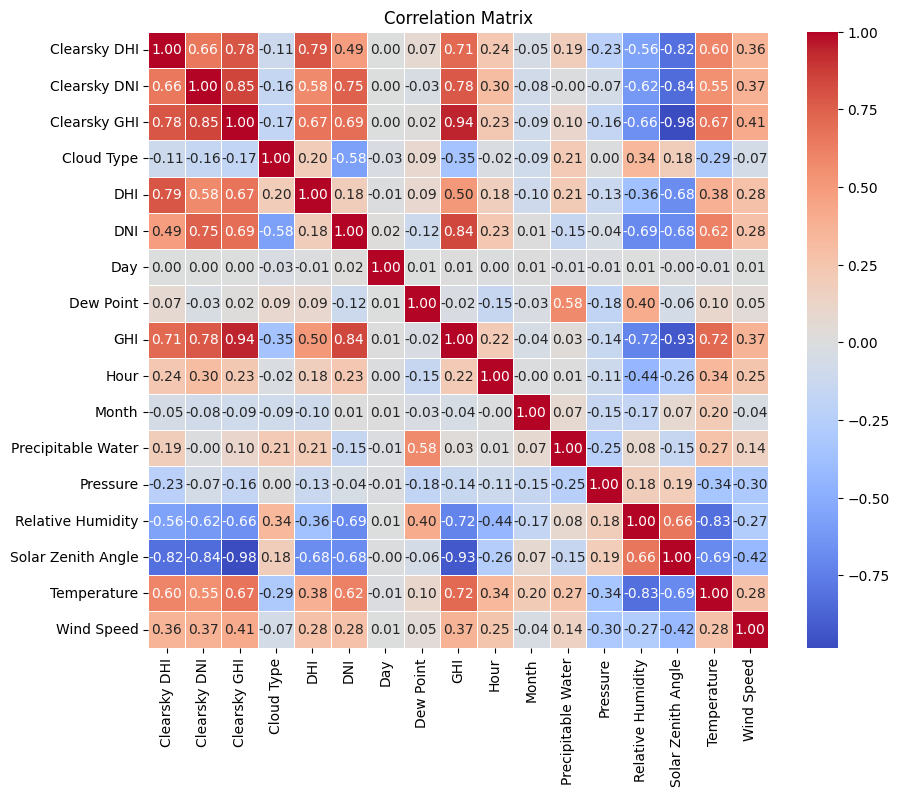

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns to include in the correlation analysis
columns_to_include = filtered_solar_data.columns.difference(columns_to_encode)

# Create correlation matrix
correlation_matrix = filtered_solar_data[columns_to_include].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Skewness: 0.280178
Kurtosis: -1.176466


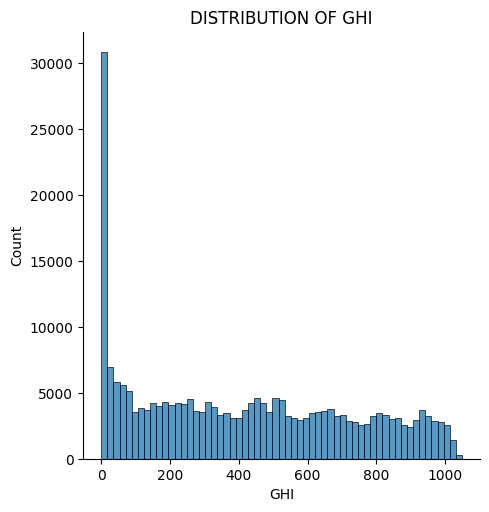

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of the target variable 'GHI'
sns.displot(filtered_solar_data['GHI']);
plt.title("DISTRIBUTION OF GHI")

# Computing skewness and kurtosis of the 'GHI' column
print("Skewness: %f" % filtered_solar_data['GHI'].skew())
print("Kurtosis: %f" % filtered_solar_data['GHI'].kurt())

<ipython-input-48-95b5dbd28305>:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


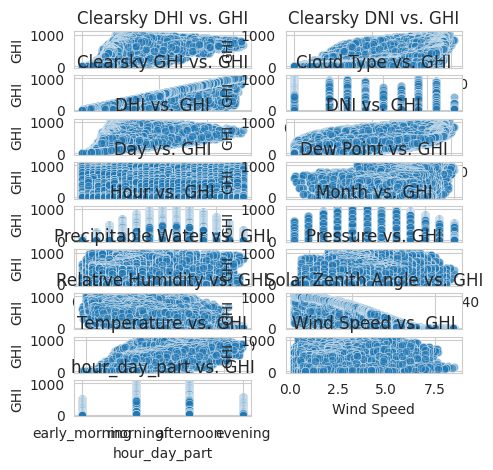

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to exclude from the visualization
features_to_exclude = ['zipcode', 'Year']

# Specify the variable to be plotted against 'GHI'
variables_to_plot = filtered_solar_data.columns.difference(['GHI'] + features_to_exclude)

# Create a compact grid of scatter plots
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")

for i, variable in enumerate(variables_to_plot, start=1):
    plt.subplot(len(variables_to_plot)//2 + 1, 2, i)
    sns.scatterplot(x=variable, y='GHI', data=filtered_solar_data, alpha=0.5)
    plt.title(f'{variable} vs. GHI')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Hour VERSUS GHI')

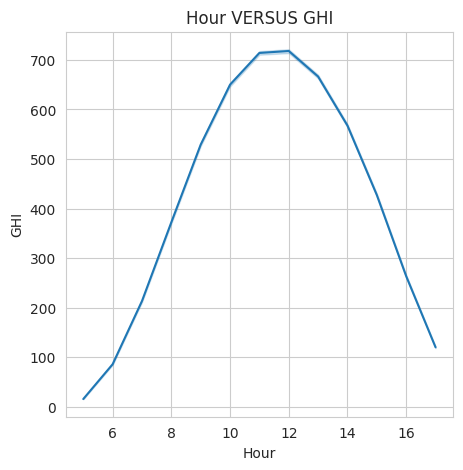

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Hour',y='GHI',data=filtered_solar_data)
plt.title("Hour VERSUS GHI")

Text(0.5, 1.0, 'Clearsky DHI VERSUS GHI')

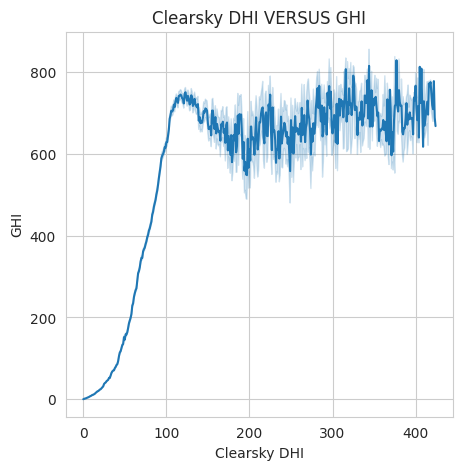

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Clearsky DHI',y='GHI',data=filtered_solar_data)
plt.title("Clearsky DHI VERSUS GHI")

Text(0.5, 1.0, 'Temperature VERSUS GHI')

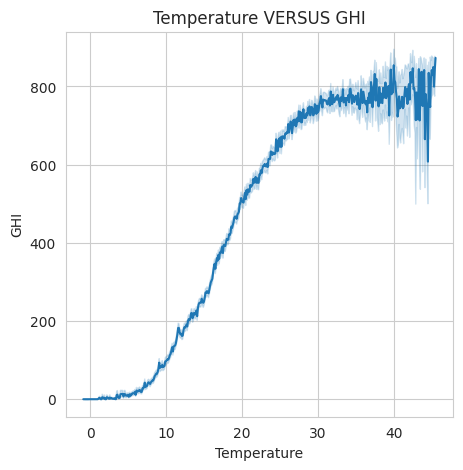

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Temperature',y='GHI',data=filtered_solar_data)
plt.title("Temperature VERSUS GHI")

Text(0.5, 1.0, 'DHI VERSUS GHI')

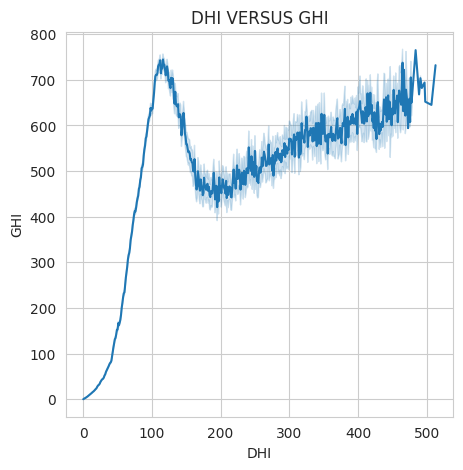

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x='DHI',y='GHI',data=filtered_solar_data)
plt.title("DHI VERSUS GHI")

Text(0.5, 1.0, 'Solar Zenith Angle vs GHI')

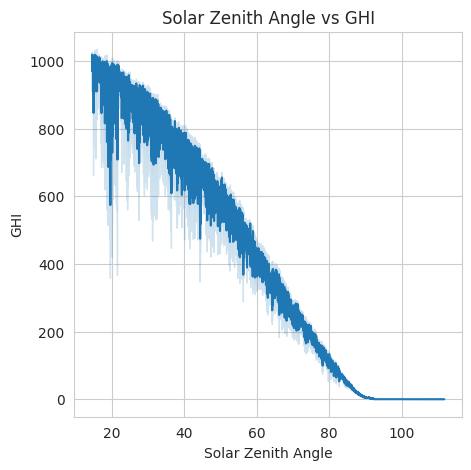

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x='Solar Zenith Angle',y='GHI',data=filtered_solar_data)
plt.title("Solar Zenith Angle vs GHI")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming your target variable is named 'target_column'
X = filtered_encoded_data.drop(columns=['GHI'])
y = filtered_encoded_data['GHI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of polynomial features
degree = 2  # Adjust as needed

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
# Fit polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Predictions
train_predictions = model.predict(X_train_poly)
test_predictions = model.predict(X_test_poly)

# Evaluate model
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 1.324976670257339
Test RMSE: 1.3331405966995826


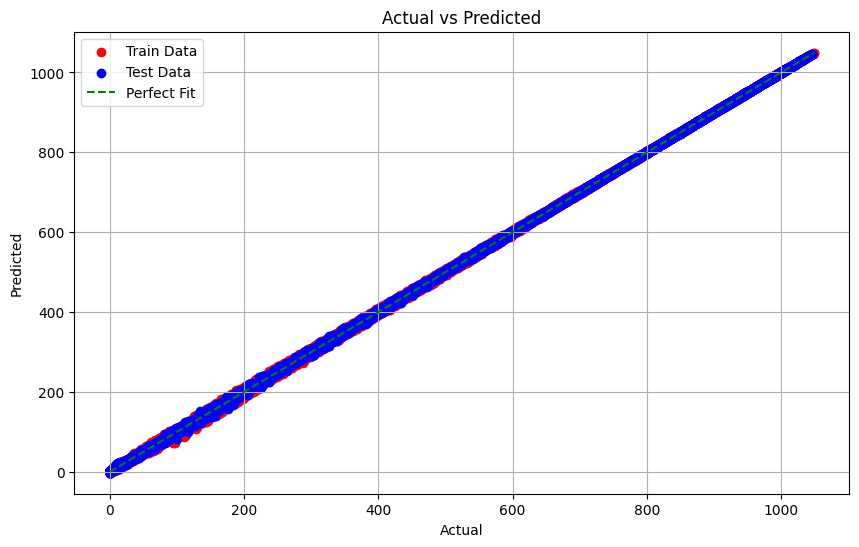

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='red', label='Train Data')
plt.scatter(y_test, test_predictions, color='blue', label='Test Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='green', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()